# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Project
## Flavour Sense Prediction By Life And Climate

In [56]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\FlavorSense.csv")

# Data Info

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          9032 non-null   float64
 1   sleep_cycle                  9316 non-null   object 
 2   exercise_habits              9196 non-null   object 
 3   climate_zone                 9467 non-null   object 
 4   historical_cuisine_exposure  9346 non-null   object 
 5   preferred_taste              10000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 468.9+ KB


In [58]:
df.columns

Index(['age', 'sleep_cycle', 'exercise_habits', 'climate_zone',
       'historical_cuisine_exposure', 'preferred_taste'],
      dtype='object')

In [59]:
df.shape

(10000, 6)

In [60]:
df.head()

,age,sleep_cycle,exercise_habits,climate_zone,historical_cuisine_exposure,preferred_taste
0,56.0,Irregular,Heavy,Temperate,NaN,Salty
1,NaN,Night Owl,Heavy,Temperate,Asian,Sweet
2,46.0,Night Owl,Heavy,Cold,Mixed,Sour
3,32.0,Early Bird,Heavy,Cold,Mediterranean,Salty
4,60.0,Night Owl,Moderate,Dry,Mediterranean,Sour


# Data Cleaning & Handling

In [61]:
# Fill missing values in 'age' with mean
df['age'].fillna(df['age'].mean(), inplace=True)

# Fill missing values in categorical columns with mode
categorical_cols = ['sleep_cycle', 'exercise_habits', 'climate_zone', 'historical_cuisine_exposure']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [62]:
df.isna().sum()
df.duplicated().sum()

np.int64(4853)

In [63]:
df.columns

Index(['age', 'sleep_cycle', 'exercise_habits', 'climate_zone',
       'historical_cuisine_exposure', 'preferred_taste'],
      dtype='object')

In [64]:
df["age"]=df["age"].astype("int")

# EDA & Visualization

In [65]:
sorted_ages = sorted(df["age"].unique(), reverse=False)
num_ranges=np.arange(18,70)
bins = [17, 25, 35, 45, 55, 65, 70]  # 17 to catch age 18, 70 to include 69
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-69']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df.drop(columns=["age"],inplace=True)

# Histogram Distribution

### To determine the taste buds and flavour choices we need to identify the climate zone and the area that the people live in, Cause it is the most crucial part to examine the preferred choice of taste of people around the world

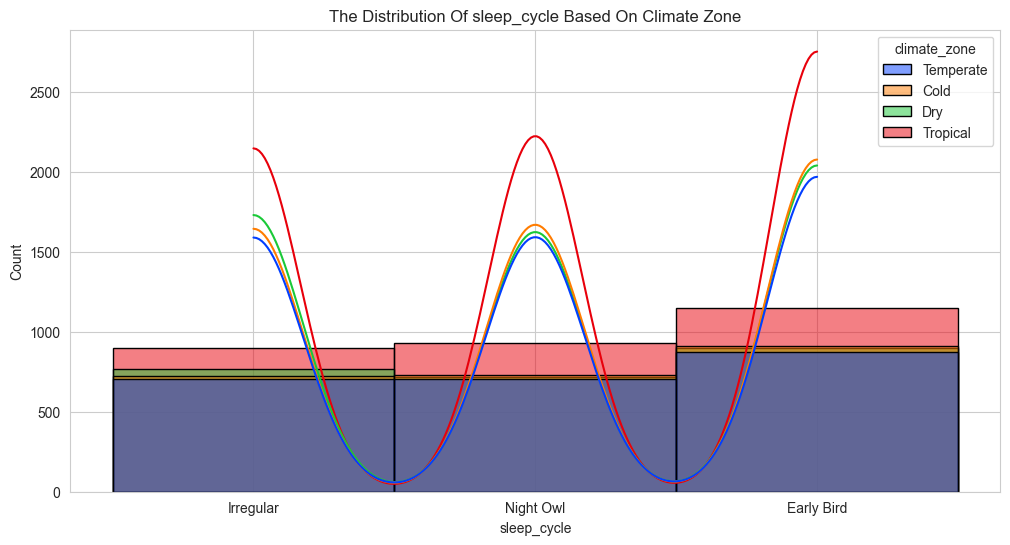

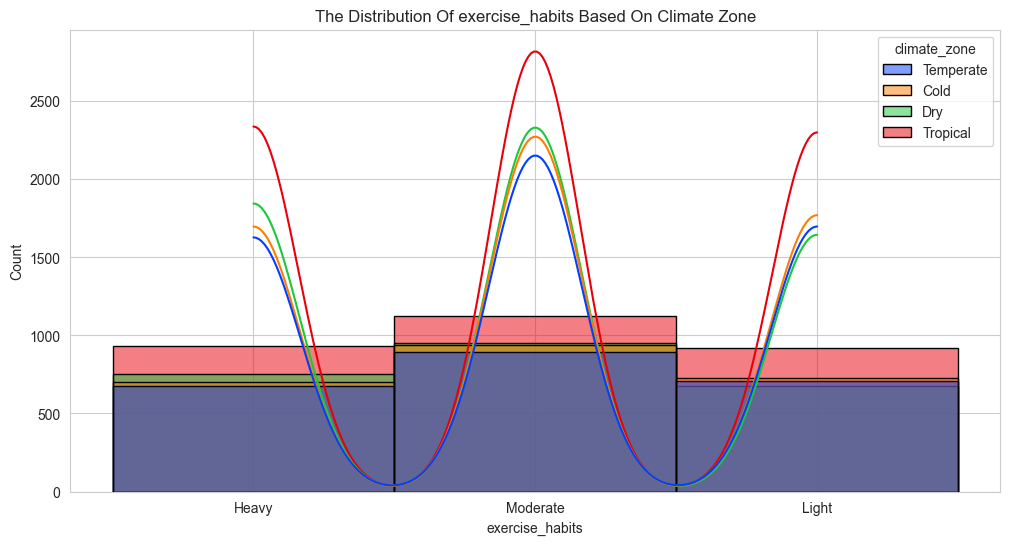

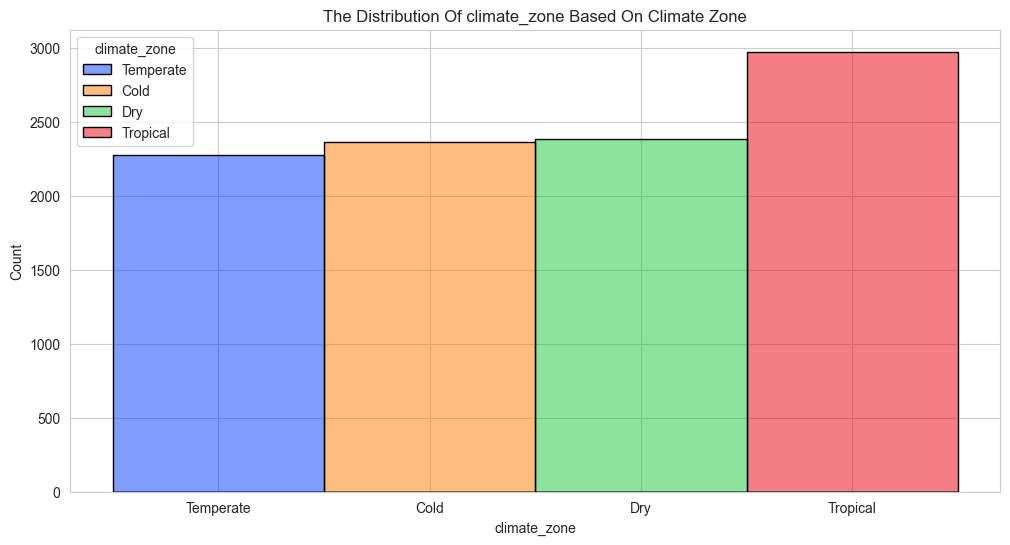

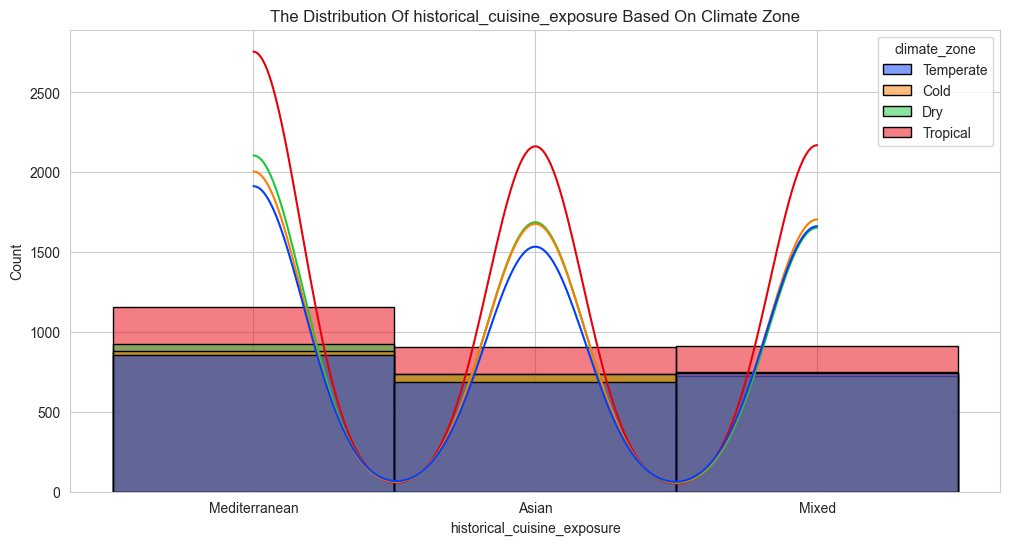

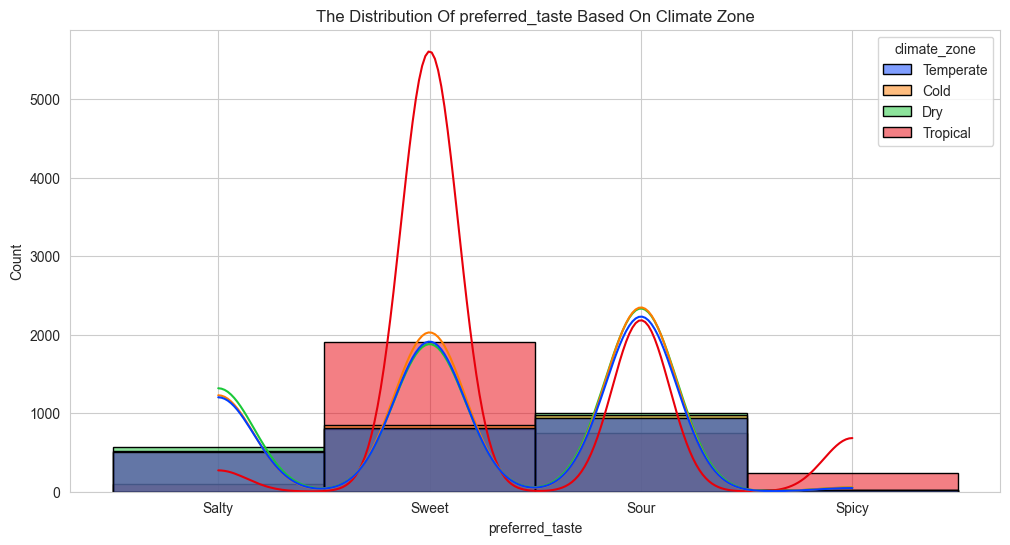

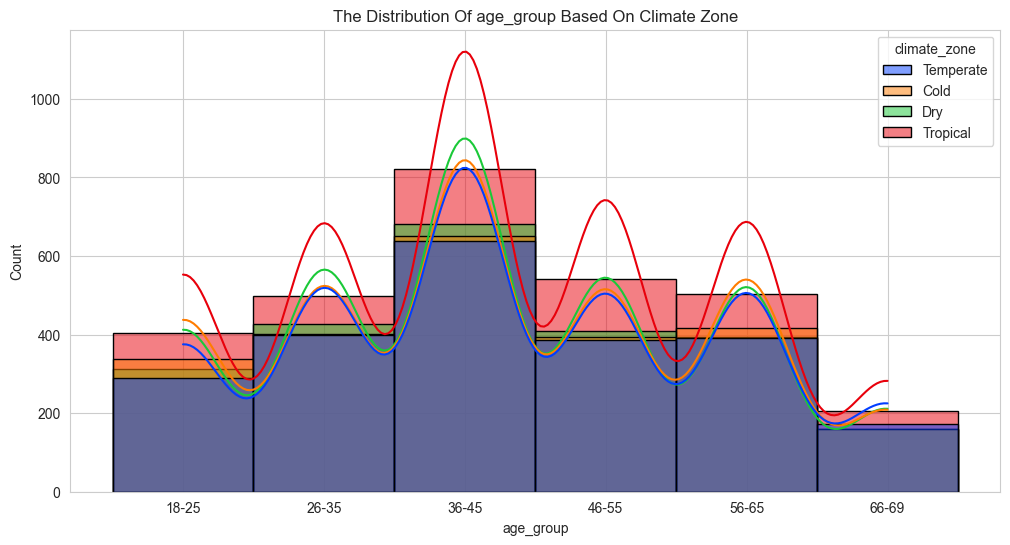

In [66]:
for col in df:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=col,kde=True,hue="climate_zone",palette="bright",edgecolor="black")
    plt.title(f"The Distribution Of {col} Based On Climate Zone")
    plt.show()


# Sleep cycle classification by age group

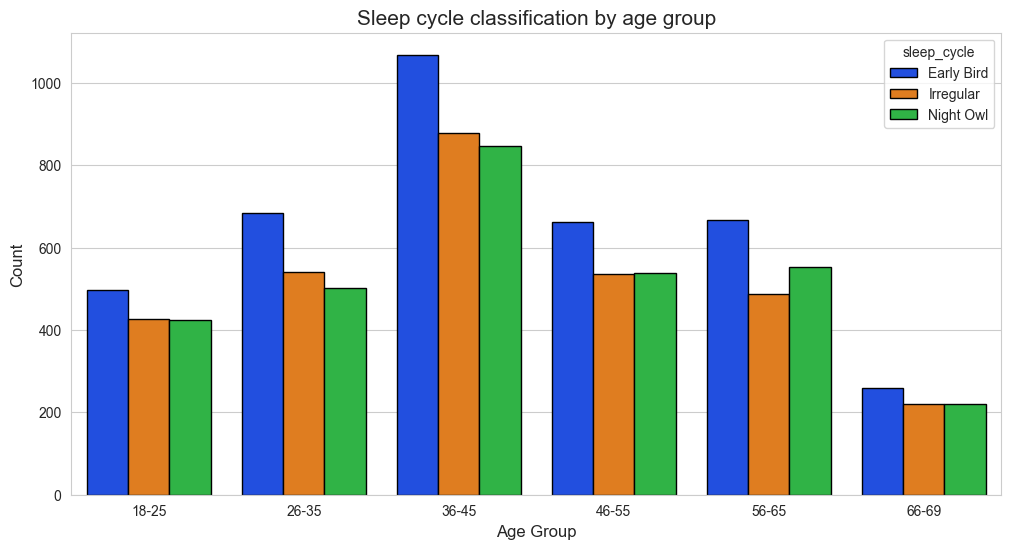

In [67]:
classifi_ag=df.groupby(["sleep_cycle","age_group"]).size().reset_index(name="count")
classifi_ag
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_ag,x="age_group",y="count",hue="sleep_cycle",edgecolor='black',palette="bright")
plt.title("Sleep cycle classification by age group",size=15)
plt.xlabel("Age Group",size=12)
plt.ylabel("Count",size=12)
plt.show()


# Preferred Taste Classification By Different Factors

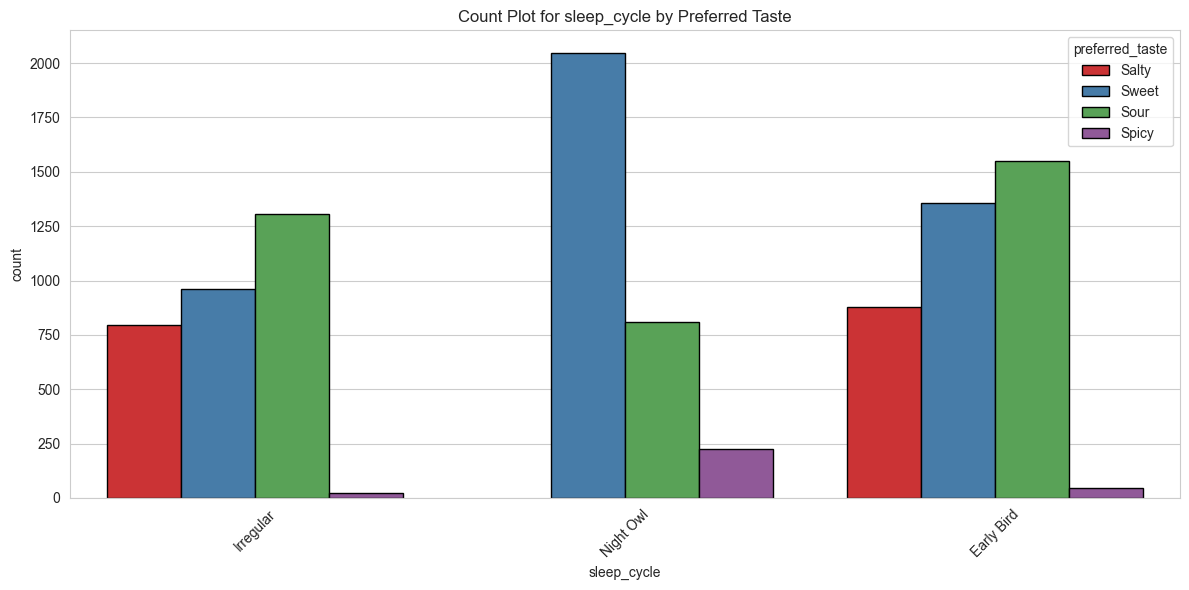

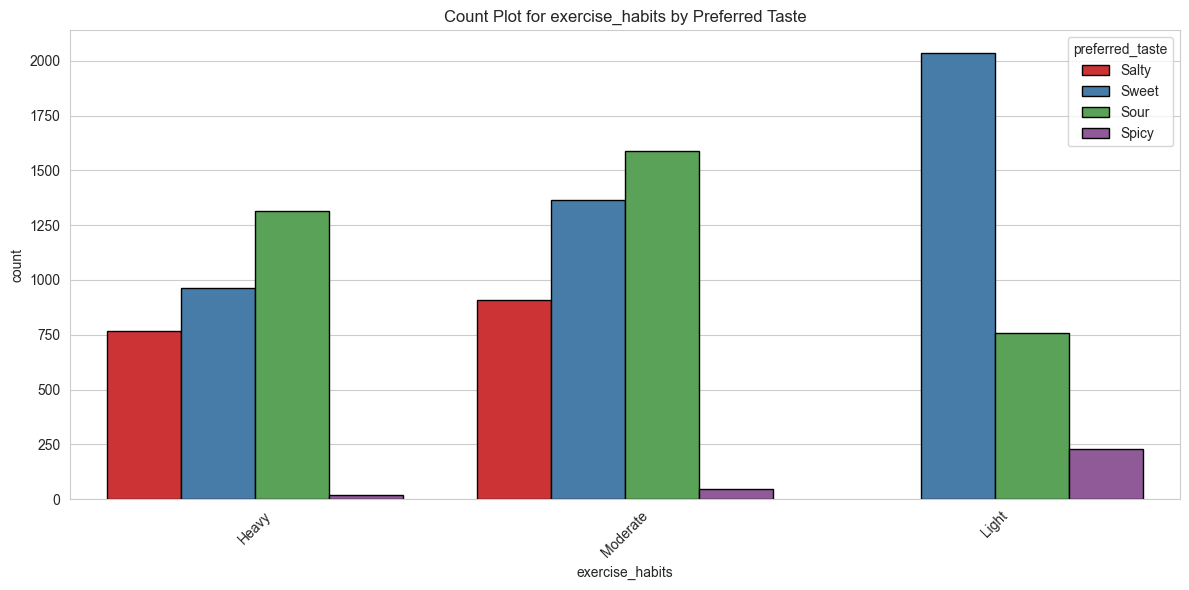

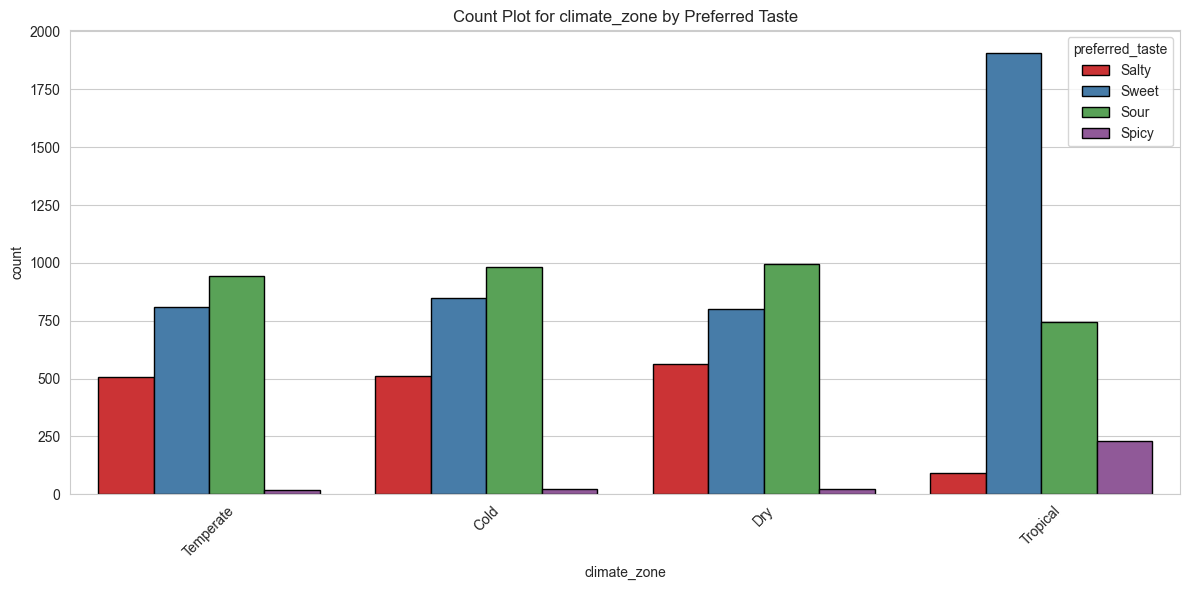

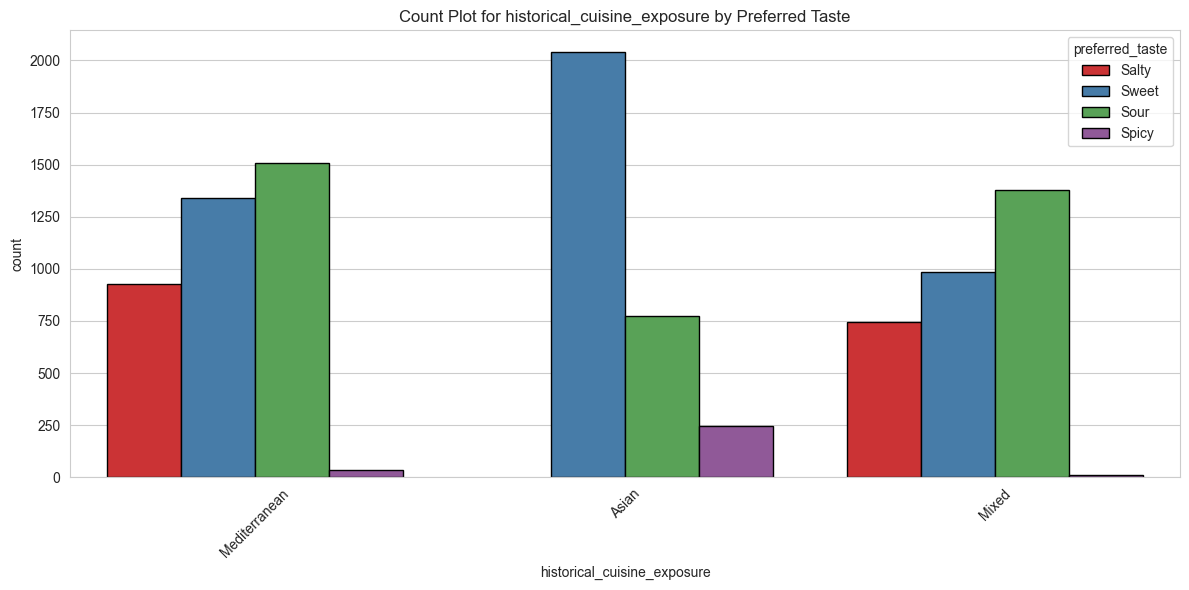

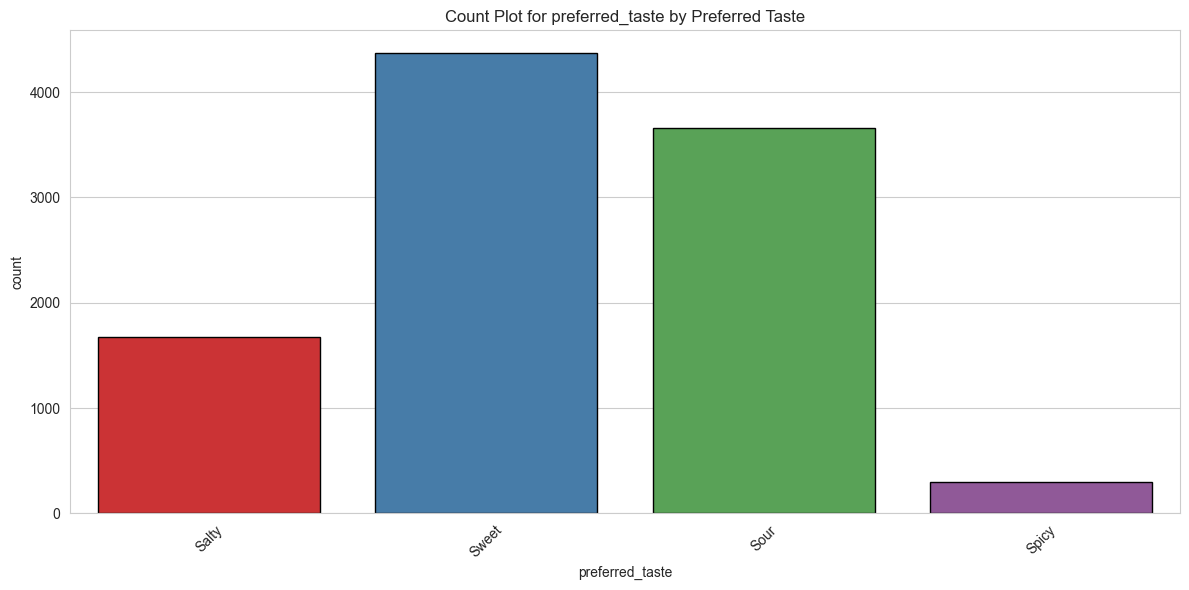

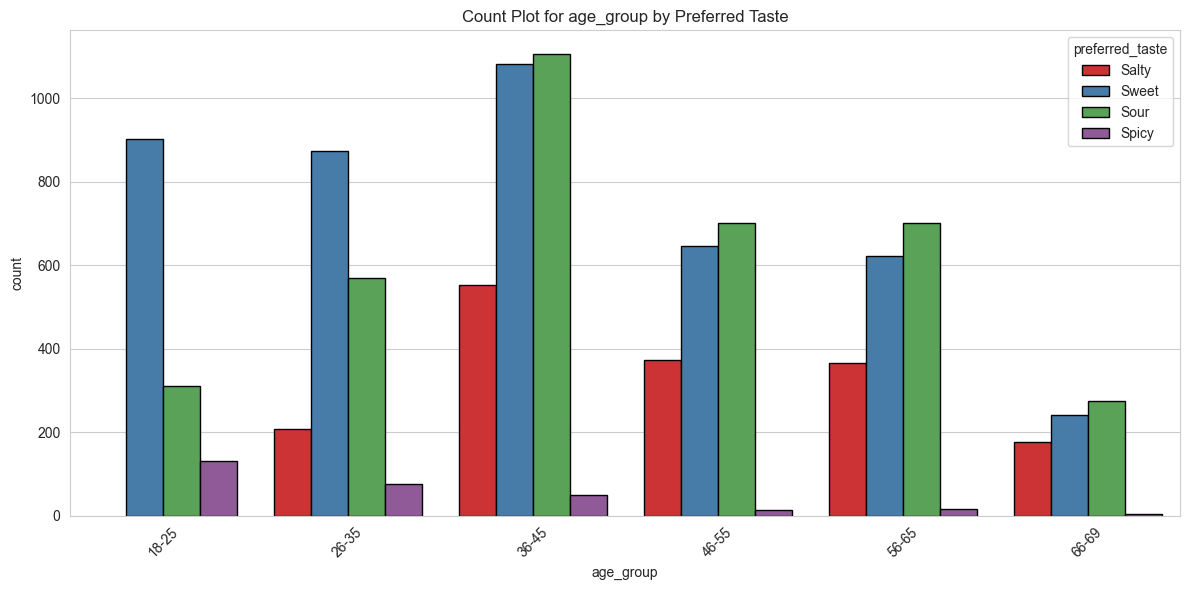

In [68]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=col, hue='preferred_taste', palette='Set1',edgecolor="black")
        plt.title(f'Count Plot for {col} by Preferred Taste')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Pie Classification Historical Cuisine Exposure And Preferred Taste

In [69]:
import plotly.express as px

# PIE CHART for 'historical_cuisine_exposure'
fig1 = px.pie(df, names='historical_cuisine_exposure',
              title='Historical Cuisine Exposure Distribution',
              hole=0.4)  # optional: to make it a donut
fig1.update_traces(textinfo='percent+label')
fig1.show()

# PIE CHART for 'preferred_taste'
fig2 = px.pie(df, names='preferred_taste',
              title='Preferred Taste Distribution',
              hole=0.4)
fig2.update_traces(textinfo='percent+label')
fig2.show()


# Climate Zone Chart

In [70]:
import plotly.express as px

fig = px.pie(df, names='climate_zone', title='Climate Zone Distribution')
fig.show()

In [71]:
crt=pd.crosstab(df['sleep_cycle'], df['preferred_taste'], normalize='index') * 100
crt.style.background_gradient(cmap="Reds")

preferred_taste,Salty,Sour,Spicy,Sweet
sleep_cycle,,,,
Early Bird,22.932429,40.438299,1.226194,35.403079
Irregular,25.802269,42.269044,0.745543,31.183144
Night Owl,0.000000,26.249189,7.300454,66.450357


<Axes: xlabel='preferred_taste', ylabel='historical_cuisine_exposure'>

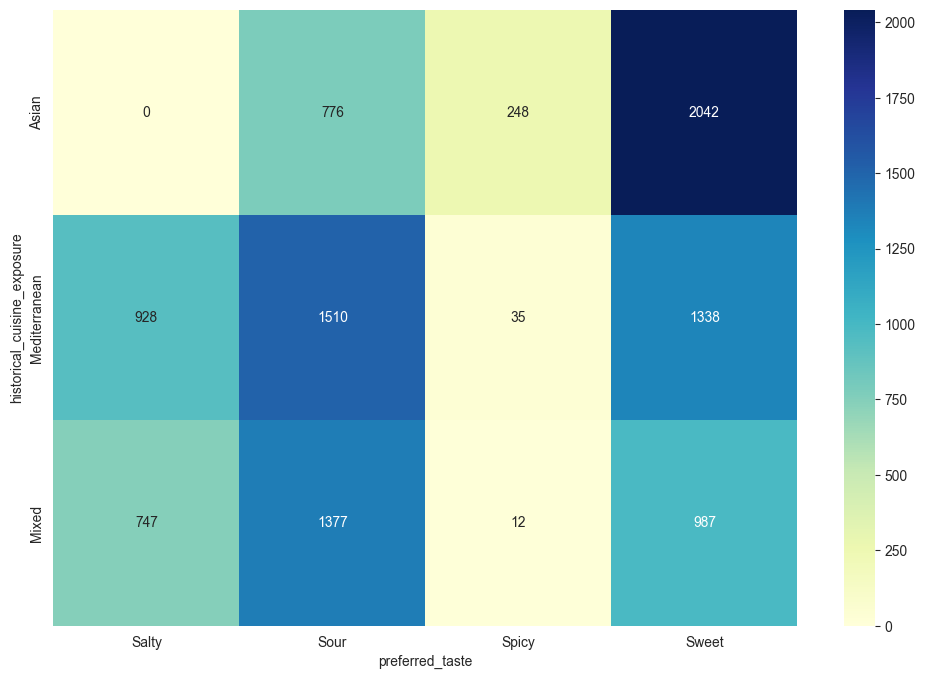

In [72]:
heatmap_data = pd.crosstab(df['historical_cuisine_exposure'], df['preferred_taste'])
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')


# Detailed Relation Of Age Group,Sleep Cycle & Preferred Taste

In [73]:
import plotly.express as px
fig = px.sunburst(df, path=['age_group', 'sleep_cycle', 'preferred_taste'], values=None)
fig.show()

# Interactive Visualization For Better Understanding & The Relation

In [74]:
import plotly.express as px
fig = px.parallel_categories(df, dimensions=['sleep_cycle', 'exercise_habits', 'climate_zone', 'preferred_taste'],
                             color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

# Machine Learning

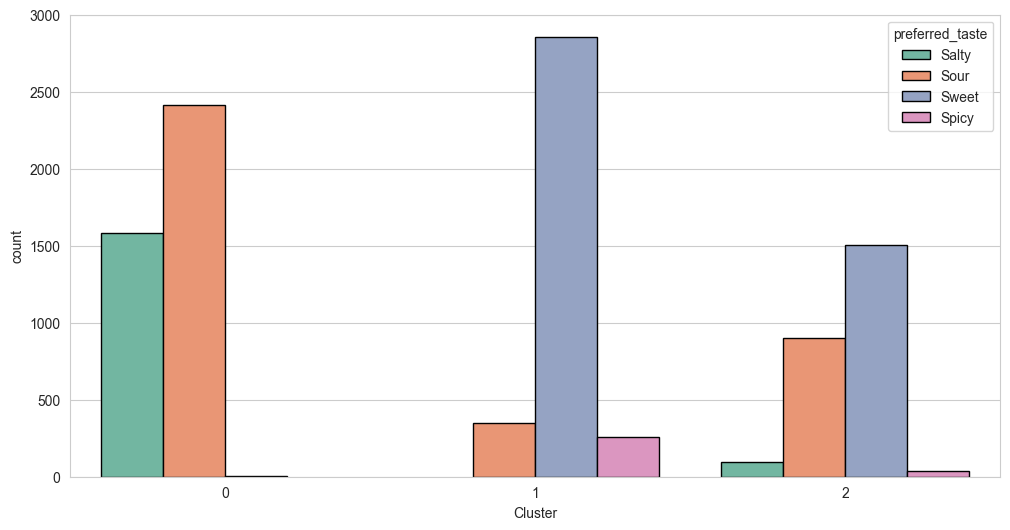

In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

df_encoded = df.copy()
for col in ['sleep_cycle', 'exercise_habits', 'climate_zone', 'historical_cuisine_exposure', 'preferred_taste', 'age_group']:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_encoded)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Cluster', hue='preferred_taste', palette='Set2',edgecolor="black")
plt.show()


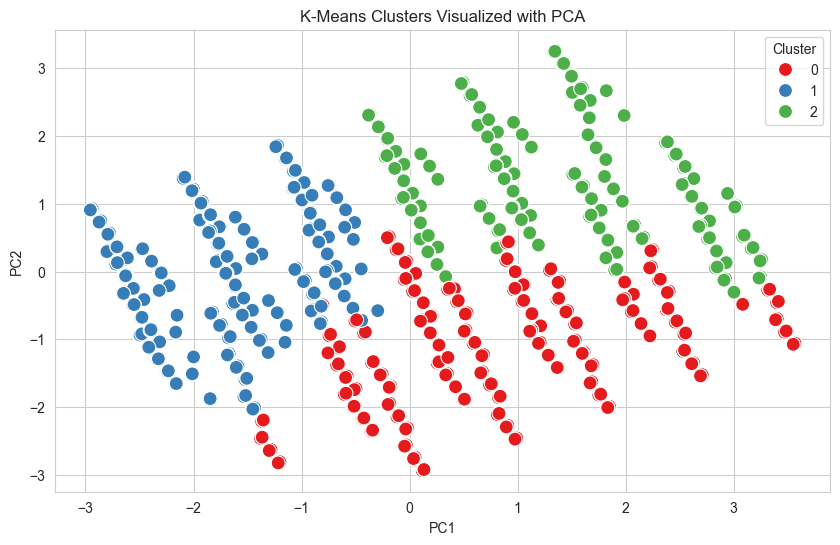

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
components = pca.fit_transform(df_encoded)

pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('K-Means Clusters Visualized with PCA')
plt.show()

# Interactive Alternative

In [81]:
import plotly.express as px

fig = px.scatter(
    pca_df, x='PC1', y='PC2', color='Cluster',
    title='Interactive K-Means Clusters (PCA)',
    hover_data=[df['age_group'], df['preferred_taste'], df['sleep_cycle']]
)
fig.show()


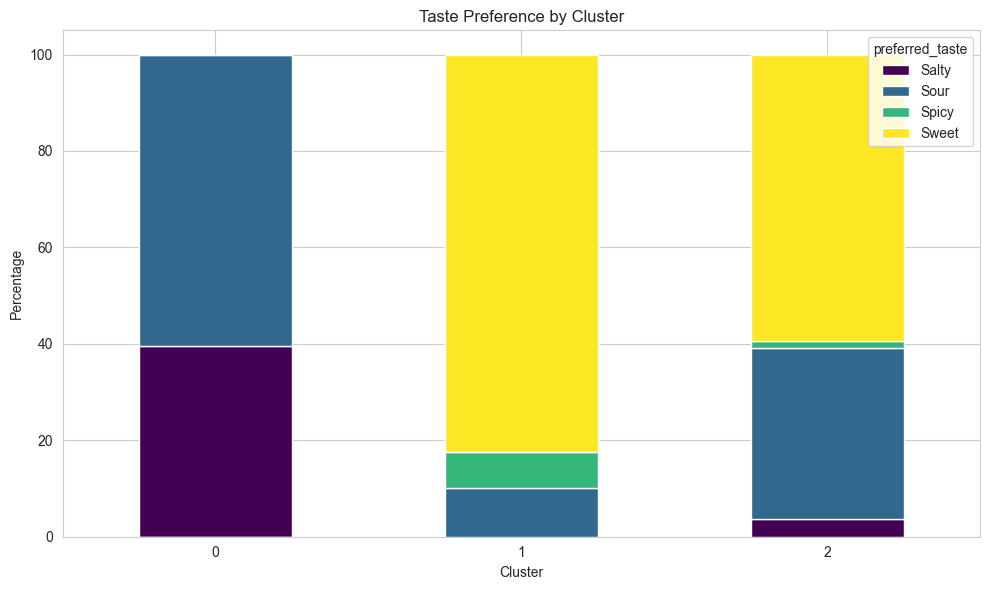

In [ ]:
taste_distribution = pd.crosstab(df['Cluster'], df['preferred_taste'], normalize='index') * 100
taste_distribution.round(2)
taste_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Taste Preference by Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [90]:
from phik import phik_matrix
phik_scores = df.phik_matrix()
phik_scores.round(2)

interval columns not set, guessing: ['Cluster']


,sleep_cycle,exercise_habits,climate_zone,historical_cuisine_exposure,preferred_taste,age_group,Cluster
sleep_cycle,1.00,0.04,0.00,0.06,0.30,0.00,0.52
exercise_habits,0.04,1.00,0.01,0.03,0.31,0.04,0.48
climate_zone,0.00,0.01,1.00,0.00,0.50,0.00,0.30
historical_cuisine_exposure,0.06,0.03,0.00,1.00,0.31,0.02,0.53
preferred_taste,0.30,0.31,0.50,0.31,1.00,0.27,0.57
age_group,0.00,0.04,0.00,0.02,0.27,1.00,0.90
Cluster,0.52,0.48,0.30,0.53,0.57,0.90,1.00


In [ ]:
X = df_encoded.drop(columns='preferred_taste')
y = df_encoded['preferred_taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.8345


In [78]:
y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
acc

0.8345